In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("./train.csv")

data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T  # Transpose the data
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0
_, m_train = X_train.shape


def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(0, Z)


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def derive_ReLU(Z):
    return Z > 0


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * derive_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2


def get_predictions(A2):
    return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(
            W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    return W1, b1, W2, b2

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()





In [2]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 1)

Prediction:  [2]
Label:  2


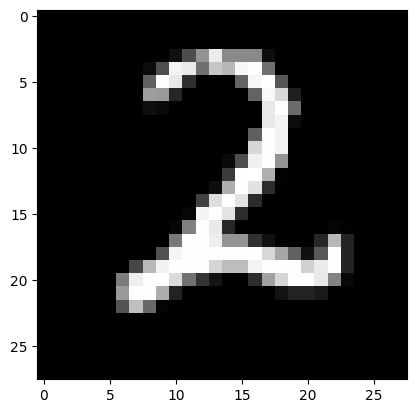

In [3]:
test_prediction(6134, W1, b1, W2, b2)


In [4]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 8 9 6 9 6 6 5 3 3 2 1 9 2 7 1 5 7 0 2 7 8 0 7 8 1 1 0 5 9 9 4 9 4 0 0 4
 8 5 9 1 6 0 1 2 0 6 2 9 3 2 8 1 7 4 1 1 1 9 4 9 1 9 1 9 9 4 2 3 5 6 7 8 1
 3 6 7 9 0 5 1 1 3 9 3 7 4 2 4 5 2 1 0 0 5 1 6 4 5 7 9 4 8 3 4 3 0 7 6 2 3
 8 4 7 5 0 8 5 7 7 6 2 7 3 1 0 1 1 7 3 5 0 4 0 9 6 9 0 7 4 3 8 6 3 6 9 5 8
 9 4 5 4 1 6 7 1 2 0 8 4 0 4 3 9 0 2 9 7 1 1 0 5 1 8 9 5 6 8 1 5 1 1 3 7 2
 4 0 3 2 4 3 9 8 1 8 1 1 8 3 9 1 9 7 3 7 5 7 3 3 8 3 5 4 9 9 8 9 1 3 6 7 5
 7 9 6 3 4 5 9 6 6 1 5 3 0 2 3 1 3 0 0 7 1 7 0 4 3 8 8 5 7 1 8 1 2 1 8 6 7
 2 6 7 9 4 4 8 1 3 3 8 3 7 1 3 2 2 4 1 6 4 3 7 4 8 5 6 9 7 7 0 7 0 0 4 0 7
 1 4 2 3 0 7 9 4 1 3 1 5 1 8 9 9 3 0 0 4 1 6 7 2 2 5 6 3 7 7 5 8 1 3 9 6 7
 9 0 6 2 3 7 5 4 3 4 1 0 5 2 6 7 4 3 3 6 7 3 6 1 5 8 8 5 3 2 9 1 7 6 0 7 9
 6 0 7 4 7 0 7 6 2 0 4 4 1 1 9 7 0 3 1 1 7 4 8 5 8 0 8 0 5 6 1 1 0 2 4 9 7
 3 4 1 1 1 2 8 0 0 7 3 8 2 7 9 7 5 2 6 8 0 8 9 5 0 8 0 4 5 2 4 9 0 9 1 7 1
 5 4 4 1 5 8 0 8 9 1 1 3 4 9 3 5 5 7 3 6 4 8 2 5 2 6 6 0 5 5 5 1 3 2 0 2 4
 6 6 1 4 4 0 4 6 6 7 0 9 

np.float64(0.907)